In [88]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
import h5py
from tqdm import tqdm
import scipy.io as sio
from scipy import stats
from importlib import reload
from matplotlib import pyplot as plt
import glob
import sys
sys.path.append('/home/jma819/post_cmfe_analysis')
#sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis')
import python_utils_jjm as utils_jjm
import dlc_utils
import caiman
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import scipy.spatial.distance as dist
import itertools
import math
import warnings
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
warnings.filterwarnings(action='once')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 17:21:07.666747. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [2]:
reload(utils_jjm)
reload(dlc_utils)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 14:43:36.069954. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


<module 'dlc_utils' from '/home/jma819/post_cmfe_analysis/dlc_utils.py'>

In [3]:
#cnmfe_file_key = pd.read_csv('/Volumes/My_Passport/dlc_analysis/behavcamvideos/open_field_miniscope/cnmfe_key.csv')
cnmfe_file_key = pd.read_csv('/projects/p30771/dlc_analysis/openfield_dlc_output/cnmfe_key.csv')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 14:43:38.364138. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [4]:
#cnmfe_base_dir = '/Volumes/My_Passport/cnmfe_analysis_files/batch_output_files/'
cnmfe_base_dir = '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/'
#'27-Feb_17_33_59_out.mat' '28-Feb_16_21_21_out.mat' '25-Mar_14_22_02_out.mat', '25-Mar_14_22_44_out.mat', '26-Mar_18_33_55_out.mat', '27-Mar_00_26_12_out.mat', '27-Mar_00_48_46_out.mat' throwing error
wt_CNMFE_files = ['29-Jan_12_35_06_out.mat','30-Mar_20_39_05_out.mat', '30-Mar_20_45_16_out.mat', '22-Mar_22_52_02_out.mat', '28-Feb_16_10_05_out.mat', '27-Feb_17_32_15_out.mat', '25-Mar_13_27_27_out.mat','27-Feb_17_33_59_out.mat', '28-Feb_16_21_21_out.mat', '25-Mar_14_22_02_out.mat', '25-Mar_14_22_44_out.mat', '26-Mar_18_33_55_out.mat', '27-Mar_00_26_12_out.mat', '27-Mar_00_48_46_out.mat']

ko_CNMFE_files = ['30-Jan_16_54_31_out.mat','30-Jan_14_00_19_out.mat','31-Jan_01_43_49_out.mat','31-Jan_00_12_24_out.mat','31-Mar_13_28_15_out.mat', '29-Mar_21_42_20_out.mat', '13-Apr_17_57_40_out.mat', '29-Mar_14_27_55_out.mat', '13-Apr_16_01_20_out.mat',
                 '13-Apr_16_11_27_out.mat', '29-Mar_13_39_44_out.mat']

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 14:43:44.761946. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [5]:
#tracking_files = ['/Volumes/My_Passport/dlc_analysis/behavcamvideos/open_field_miniscope/'+utils_jjm.find_behavior_tracking(fname, cnmfe_file_key) for fname in wt_CNMFE_files] 
tracking_files = ['/projects/p30771/dlc_analysis/openfield_dlc_output/'+utils_jjm.find_behavior_tracking(fname, cnmfe_file_key) for fname in wt_CNMFE_files] 

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 14:43:45.932794. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [6]:
#tracking_files

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 14:43:50.747679. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [7]:
CNMFE_dir_paths_list = [str(cnmfe_base_dir+fname) for fname in wt_CNMFE_files]
#CNMFE_dir_paths_list

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 14:43:51.998897. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [8]:
CNMFE_dir_paths_list

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 14:43:53.114314. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


['/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/29-Jan_12_35_06_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_39_05_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_45_16_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/22-Mar_22_52_02_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/28-Feb_16_10_05_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/27-Feb_17_32_15_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/25-Mar_13_27_27_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/27-Feb_17_33_59_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/28-Feb_16_21_21_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/25-Mar_14_22_02_

In [9]:
tracking_files

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 14:43:53.902260. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


['/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN039_H12_M26_S54/GRIN039_H12_M26_S54_dlc_tracking_foranalysis_04142020.csv',
 '/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN013_H13_M33_S54/GRIN013_H13_M33_S54_dlc_tracking_foranalysis_04142020.csv',
 '/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN027_H13_M29_S44/GRIN027_H13_M29_S44_dlc_tracking_foranalysis_04142020.csv',
 '/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN033_H14_M34_S32/GRIN033_H14_M34_S32_dlc_tracking_foranalysis_04142020.csv',
 '/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN033_H13_M42_S33/GRIN033_H13_M42_S33_dlc_tracking_foranalysis_04142020.csv',
 '/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN032_H17_M30_S22/GRIN032_H17_M30_S22_dlc_tracking_foranalysis_04142020.csv',
 '/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN034_H15_M28_S2/GRIN034_H15_M28_S2_dlc_tracking_foranalysis_04142020.csv',
 '/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN026_H16_M35_S3

In [10]:
binning_time = 1 # seconds 
body_part_for_tracking = 'tail_base' #

grouped_raw_data = {}
success = []
failed = []
for CNMFE_file, tracking_file in zip(CNMFE_dir_paths_list, tracking_files):
    print(CNMFE_file)
    print(tracking_file)
    try:
        # load cell fluorescence 
        cell_fluorescence = sio.loadmat(CNMFE_file)
        C_timedelta = utils_jjm.create_fluorescence_time_delta(cell_fluorescence['C'])
        C_normalized = C_timedelta.apply(utils_jjm.normalize).set_index(pd.to_timedelta(np.linspace(0, (len(C_timedelta)-1)*(1/20), len(C_timedelta)), unit='s'), drop=True)
        C_z_scored = C_timedelta.apply(stats.zscore).set_index(pd.to_timedelta(np.linspace(0, (len(C_timedelta)-1)*(1/20), len(C_timedelta)), unit='s'), drop=True)
        C_normalized_z_scored = C_normalized.apply(stats.zscore).set_index(pd.to_timedelta(np.linspace(0, (len(C_normalized)-1)*(1/20), len(C_normalized)), unit='s'), drop=True)
        # create tracking time deltas
        interpolated = utils_jjm.prepare_timedelta_dfs(tracking_file)
        #C_z_scored_filtered = utils_jjm.filter_out_by_size(C_z_scored, cell_contours, for_dims, 0.6, 100)
        #store results 
        #load spatial components by session
        com_df, spatial_components = utils_jjm.return_spatial_info(CNMFE_file, 0.6)
        cell_contours, for_dims = utils_jjm.create_contour_layouts(spatial_components)
        
        #store results 
        grouped_raw_data[tracking_file.split('/')[-2]] = {'C': C_timedelta, 'C_z_scored': C_z_scored, 'C_normalized': C_normalized, 'C_normalized_z_scored': C_normalized_z_scored, 
                                                          'interpolated' : interpolated, 'com' : com_df, 'spatial_components' : spatial_components, 'cell_contours': cell_contours,  
                                                         'for_dims' : for_dims}
        success.append((tracking_file.split('/')[-2], CNMFE_file.split('/')[-1]))
    except FileNotFoundError:
        failed.append(tracking_file)
    except OSError:
        failed.append(tracking_file)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 14:43:59.733830. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/29-Jan_12_35_06_out.mat
/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN039_H12_M26_S54/GRIN039_H12_M26_S54_dlc_tracking_foranalysis_04142020.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_39_05_out.mat
/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN013_H13_M33_S54/GRIN013_H13_M33_S54_dlc_tracking_foranalysis_04142020.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_45_16_out.mat
/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN027_H13_M29_S44/GRIN027_H13_M29_S44_dlc_tracking_foranalysis_04142020.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/22-Mar_22_52_02_out.mat
/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN033_H14_M34_S32/GRIN033_H14_M34_S32_dlc_tracking_foranalysis_04142020.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/28-Feb_16_10_05_out.mat

In [11]:
## combine dfs for each session to bin velocity values across dfs
#downsample
new_sampling_interval = .2
V_df = pd.concat([grouped_raw_data[session]['interpolated'].resample(str(new_sampling_interval)+'S').max() 
                  for session in list(grouped_raw_data.keys())], keys=list(grouped_raw_data.keys()))
all_sessions_v_bins = pd.cut(V_df['tail_base'], bins=50)

V_df['velocity_bins'] = all_sessions_v_bins

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 14:44:32.299412. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [ ]:
#V_df.index

In [85]:
'";"'.join(list(grouped_raw_data.keys()))



/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 17:02:46.069378. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


'GRIN039_H12_M26_S54";"GRIN013_H13_M33_S54";"GRIN027_H13_M29_S44";"GRIN033_H14_M34_S32";"GRIN033_H13_M42_S33";"GRIN032_H17_M30_S22";"GRIN034_H15_M28_S2";"GRIN026_H16_M35_S34";"GRIN032_H16_M49_S22";"GRIN034_H16_M13_S22";"GRIN034_H19_M0_S18";"GRIN035_H13_M50_S58";"GRIN035_H13_M31_S20";"GRIN035_H14_M40_S34'

In [51]:
## for spatial clustering start by using z scored data on whole trace as input to event detection function, then try with z score based 
#on rest or other periods
C_traces_filtered_for_analysis = {}
com_filtered_for_analysis = {}
for session in list(grouped_raw_data.keys()):
    # get indicies of small cells 
    cells_to_drop = np.array([int(cell) for cell in range(1, len(grouped_raw_data[session]['cell_contours'])+1) if 
                              len(np.array(np.where(grouped_raw_data[session]['for_dims'][cell]>0.6)[0]))<100])
    C_traces_filtered = grouped_raw_data[session]['C_normalized_z_scored'].drop(cells_to_drop, axis=1)
    
    C_traces_filtered_for_analysis[session] = C_traces_filtered.drop('msCamFrame', axis=1)
    com_filtered_for_analysis[session] = grouped_raw_data[session]['com'].drop(cells_to_drop, axis=0).transpose()

# sets sampling interval to 5Hz to correspond to behavior data 
C_z_score_df = pd.concat([C_traces_filtered_for_analysis[session].resample(str(new_sampling_interval)+'S').max()
                  for session in list(C_traces_filtered_for_analysis.keys())], axis=1, keys=list(C_traces_filtered_for_analysis.keys()))

# after downsampling convert back to regular index, timedelta is behaving oddly 
C_z_score_df_reindexed = pd.concat([C_z_score_df[session].reset_index(drop=True) 
                                    for session in list(set(C_z_score_df.columns.get_level_values(0)))], axis=1, keys=list(set(C_z_score_df.columns.get_level_values(0))))
# drop columns with all nan values
C_z_score_df_reindexed.dropna(axis=1, how='all', inplace=True)
# create com dataframe
#com_df_filtered_for_analysis = pd.concat(com_filtered_for_analysis, axis=0, keys=list(com_filtered_for_analysis.keys()))

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 15:00:52.755632. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [52]:
# do same for velocity dataframe
V_df_reindexed = pd.concat([V_df.loc[session].reset_index(drop=True)
                            for session in list(set(V_df.index.get_level_values(level=0)))], axis=1, keys=list(set(V_df.index.get_level_values(level=0)))) 

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 15:00:55.282821. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [53]:
#V_df_reindexed

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 15:01:00.889967. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [78]:
save_directory = '/projects/p30771/miniscope/analysis/OpenFieldAnalysis/spatial_clusters/jones_script_analysis/data/wt/'

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 16:49:10.018606. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [79]:
## save each session csv file individually for loading into MATLAB
# using MATLAB readtable function, which will create variable names from column header 
for session in list(set(C_z_score_df_reindexed.columns.get_level_values(0))):
    C_z_score_df_reindexed[session].to_csv(save_directory+session+'_C_traces_filtered.csv')
    com_filtered_for_analysis[session].to_csv(save_directory+session+'_com_filtered.csv')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 16:49:10.693896. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [60]:
session = 'GRIN039_H12_M26_S54'
com_filtered_for_analysis[session]

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 15:01:43.184780. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,1,2,3,4,6,8,9,10,11,12,...,75,77,78,80,81,82,86,87,89,92
y,68.768324,175.121865,306.436803,248.907059,64.820820,103.593715,245.030541,232.908070,188.114636,162.647113,...,89.943974,242.028194,177.481789,178.655050,286.509182,92.350833,241.857599,225.233437,157.884239,227.283988
x,142.865010,200.405861,209.978093,232.637447,291.425813,327.802258,321.518177,316.126005,241.894612,337.694673,...,404.993333,409.473666,372.731788,431.638386,372.434666,302.876279,409.694356,440.431462,324.309089,437.913424


In [61]:
C_z_score_df_reindexed[session]

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 15:01:44.144586. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,1,2,3,4,6,8,9,10,11,12,...,75,77,78,80,81,82,86,87,89,92
0,0.122117,-0.249583,-0.331010,-0.205427,-0.001761,0.000024,0.025884,0.153226,-0.407156,-0.155207,...,-0.307232,-0.318615,-0.048683,-0.242338,-0.266954,0.003556,-0.346749,-0.344329,-0.321964,-0.389942
1,0.345189,-0.239506,-0.344611,-0.029356,-0.001204,-0.000250,0.005673,0.056025,-0.502389,-0.156748,...,-0.258610,-0.319024,-0.049717,-0.242149,-0.099790,0.005420,-0.346704,-0.344022,-0.419712,-0.392182
2,0.151524,-0.251308,-0.390389,0.172059,-0.001247,-0.000071,0.143671,-0.018337,-0.541076,-0.217736,...,-0.309414,-0.318901,-0.046077,-0.239031,-0.202068,0.002862,-0.346878,-0.332824,-0.325178,-0.391023
3,0.266383,-0.257562,-0.424948,-0.046623,-0.000924,-0.000437,0.174286,0.125023,-0.556792,-0.265961,...,0.131138,-0.319307,-0.041689,-0.233550,-0.295180,0.001502,-0.346973,-0.333237,-0.438767,-0.394517
4,0.404118,-0.191699,-0.430188,0.295378,-0.000758,-0.000438,0.140037,0.052118,-0.563177,-0.280471,...,-0.158925,-0.319253,-0.047461,-0.238880,-0.210345,-0.000596,-0.347196,-0.335094,-0.166306,-0.392761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9689,-0.434484,-0.426859,-0.392531,-0.908295,0.007773,-0.000570,0.129371,-0.617443,-0.545924,0.058548,...,-0.238170,-0.319701,2.401991,-0.015848,0.568414,0.002879,2.415303,1.238017,-0.293536,2.200671
9690,-0.434484,-0.458326,-0.297365,-0.908306,0.006542,-0.000622,0.105950,-0.617443,-0.555192,0.018227,...,-0.065056,-0.319701,6.123264,0.079136,2.427389,0.003249,2.344075,1.084661,-0.298945,5.697765
9691,-0.434485,-0.480435,-0.342418,-0.908314,0.006545,-0.000668,0.077391,-0.617443,-0.477569,0.123349,...,-0.109589,-0.319701,7.781861,0.045985,2.072149,0.001650,2.274682,0.945818,-0.080670,4.187395
9692,-0.434485,-0.455743,-0.369961,-0.908319,0.007796,-0.000297,0.051609,-0.617443,-0.499535,0.224164,...,-0.228926,-0.319701,4.726718,0.016241,0.293090,0.003154,2.207077,0.820115,0.069815,3.051249


In [ ]:
## load up output of jaccard compute from MATLAB

In [73]:
normlBinnedCellJaccards = np.genfromtxt('/projects/p30771/miniscope/analysis/OpenFieldAnalysis/spatial_clusters/jones_script_analysis/data/wt/GRIN039_H12_M26_S54_normlBinnedCellJaccards.csv', delimiter=',')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 16:34:26.098412. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [90]:
data_dir = '/projects/p30771/miniscope/analysis/OpenFieldAnalysis/spatial_clusters/jones_script_analysis/data/wt/'

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 17:21:22.204436. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [103]:
normlBinnedCellJaccards = {}
for file in glob.glob(data_dir+'*normlBinnedCellJaccards*'):
    normlBinnedCellJaccards[file.split('/')[-1].rstrip('_normlBinnedCellJaccards.csv')] = np.genfromtxt(file, delimiter=',')
normlBinnedCellJaccards_df = pd.DataFrame(normlBinnedCellJaccards)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 17:29:02.043643. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [106]:
normlBinnedCellJaccards_df.mean(axis=1).head()

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 17:30:06.501758. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


0    27.835929
1    17.883950
2    13.275993
3    11.637657
4    10.983914
dtype: float64

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 17:30:33.467727. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


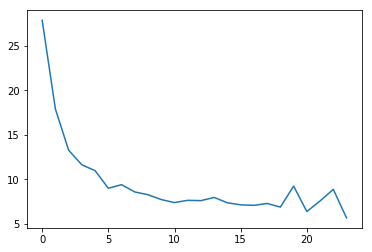

In [108]:
plt.plot(normlBinnedCellJaccards_df.mean(axis=1))

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 17:49:17.435161. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


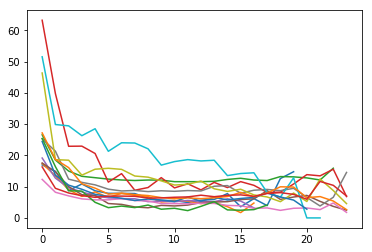

In [117]:
plt.plot(normlBinnedCellJaccards_df)
plt.show()

In [111]:
## load KO data 
data_dir_KO = '/projects/p30771/miniscope/analysis/OpenFieldAnalysis/spatial_clusters/jones_script_analysis/data/ko/'

normlBinnedCellJaccards_KO = {}
for file in glob.glob(data_dir_KO+'*normlBinnedCellJaccards*'):
    normlBinnedCellJaccards_KO[file.split('/')[-1].rstrip('_normlBinnedCellJaccards.csv')] = np.genfromtxt(file, delimiter=',')
normlBinnedCellJaccards_KO_df = pd.DataFrame(normlBinnedCellJaccards_KO)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 17:45:25.798317. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 17:46:08.479697. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


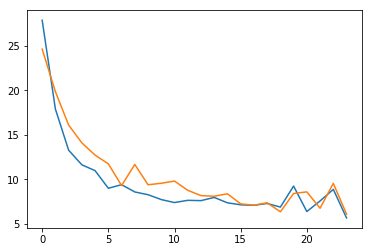

In [114]:
plt.plot(normlBinnedCellJaccards_df.mean(axis=1))
plt.plot(normlBinnedCellJaccards_KO_df.mean(axis=1))

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 17:48:59.332548. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


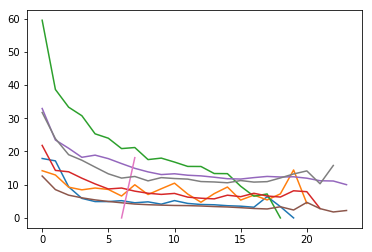

In [116]:
plt.plot(normlBinnedCellJaccards_KO_df)
plt.show()

In [123]:
list(genotype_compiled.columns)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 17:55:03.144679. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


['GRIN033_H14_M34_S32',
 'GRIN013_H13_M33_S54',
 'GRIN032_H17_M30_S22',
 'GRIN034_H19_M0_S18',
 'GRIN027_H13_M29_S44',
 'GRIN035_H14_M40_S34',
 'GRIN033_H13_M42_S33',
 'GRIN035_H13_M31_S20',
 'GRIN034_H16_M13_S22',
 'GRIN034_H15_M28_S2',
 'GRIN026_H16_M35_S34',
 'GRIN035_H13_M50_S58',
 'GRIN039_H12_M26_S54',
 'GRIN032_H16_M49_S22']

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-10 17:59:49.669800. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


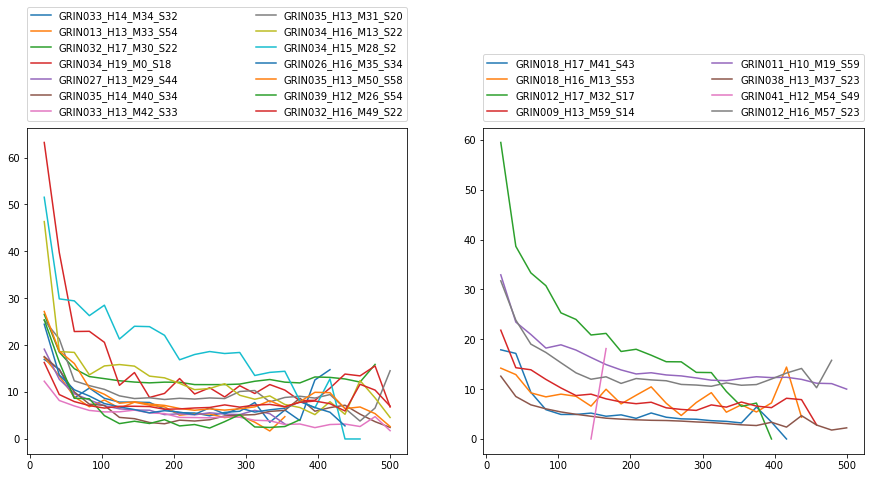

In [127]:
genotype_compiled = normlBinnedCellJaccards_df
genotype_compiled_ko = normlBinnedCellJaccards_KO_df

fig = plt.figure()
plt.subplot(1, 2, 1)

for session in list(genotype_compiled.columns):
    bin_vector = np.linspace(20, 500, len(genotype_compiled[session].values))
    plt.plot(bin_vector, genotype_compiled[session].values, label=session)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)

plt.subplot(1, 2, 2)

for session in list(genotype_compiled_ko.columns):
    bin_vector = np.linspace(20, 500, len(genotype_compiled_ko[session].values))
    plt.plot(bin_vector, genotype_compiled_ko[session].values, label=session)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)
#fig.savefig('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/openfield_analysis/spatial_clustering/summary_figs/coactivity_data_bysession_sidebyside.pdf', transparent=True)
plt.show()